# Standard imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import HpAlgorithms
import HpMLUtils
import HpMLPlots
import HpHyperParameterOptimisation
import HpTrainingFrame

In [2]:
df_mc=pd.read_hdf('pandas_INC_ge6jge4b.h5', 'INC_ge6jge4b')

# Prepare data for H+ mass regression

In [3]:
htf=HpTrainingFrame.HpTrainingFrame(df_mc) 
X_train, X_test, X_eval, y_train, y_test,y_eval, w_train, w_test, w_eval=htf.prepare(hpmass="multi", regression=True)

let's change the weights so that the signal distribution is flat in m(H+) space (and the integral of signal equals the integral of background =0.5)

In [4]:
from HpMLWeightTransformer import MultiSBWeightsScaler
msbws=MultiSBWeightsScaler(backgroundclass=0)
msbws.fit(X_train, y_train, sample_weight=w_train)
msbws.transform(X_train, y_train, sample_weight=w_train)
w_train.groupby(y_train).sum()

process
0.0       0.500000
200.0     0.006536
225.0     0.006536
250.0     0.006536
275.0     0.006536
300.0     0.009804
350.0     0.013072
400.0     0.019608
500.0     0.026144
600.0     0.026144
700.0     0.026144
800.0     0.026144
900.0     0.026144
1000.0    0.039216
1200.0    0.052288
1400.0    0.052288
1600.0    0.052288
1800.0    0.052288
2000.0    0.052288
Name: weight, dtype: float64

In [5]:
clf=HpAlgorithms.getGradientBDTRegressor()

In [6]:
clf.fit(X_train,y_train,sample_weight=w_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.13, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=20, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/ranking.py:104: Depre

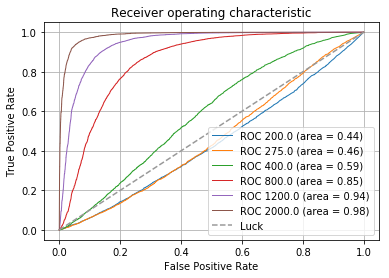

In [7]:
opt=HpHyperParameterOptimisation.HpOptimise("GradientBDTReg",clf,X_train, y_train, w_train, X_test,y_test, w_test)
opt.drawMultiClassROCCurve(backgroundclass=0)

for some masses, guessing is actually more efficient...., so that's not great... (usually in classification this doesn't happen, but given that we train on much more data than we evaluate, this is actually quite possible)
Anyways, this is probably not so surprising as these are the mass points where e.g. jet1 pt is lower for signal than for background and our training is dominated by events where jet1 pt for signal is higher than for background

-500


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/ranking.py:104: Depre

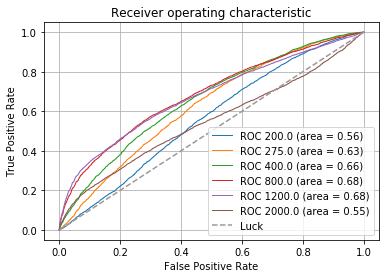

-1000


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/ranking.py:104: Depre

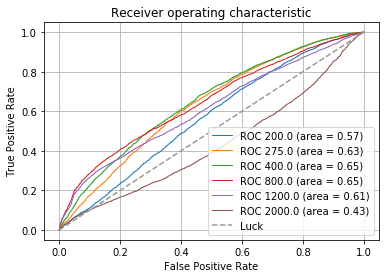

-2000


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/ranking.py:104: Depre

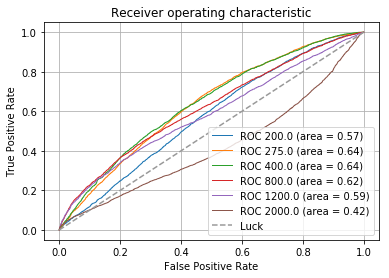

In [8]:
clf=HpAlgorithms.getGradientBDTRegressor()
for bckmass in [-500,-1000,-2000]:
    print(bckmass)
    htf=HpTrainingFrame.HpTrainingFrame(df_mc,backgroundclass=bckmass) 
    X_train, X_test, X_eval, y_train, y_test,y_eval, w_train, w_test, w_eval=htf.prepare(hpmass="multi", regression=True)
    clf.fit(X_train,y_train,sample_weight=w_train)
    opt=HpHyperParameterOptimisation.HpOptimise("GradientBDTReg",clf,X_train, y_train, w_train, X_test,y_test, w_test)
    opt.drawMultiClassROCCurve(backgroundclass=bckmass)
    plt.show()

Bottom line: these results are so clear, I didn't even bother doing some more evolved things...